In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from numpy.linalg import inv, cholesky
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%load_ext autoreload
%autoreload 2

# Generate Multivariate Normal 

Using scipy routines to generate $x \sim N (\mu, \Sigma)$ of dimension $k$. For concreteness you use $k=3$ for the rest of this document. Note that the generation process can be further broken down. The covariance matrix  $\Sigma$ can be decomposed into correlation $R$ and variances $D$ as $\Sigma = D R D$ where $D = \text{diag}(\sigma_1,\sigma_2, \sigma_3)$


Note

 - the covariance has the property that $\Sigma(i,i) = Var(x_i) = \sigma_i^2$   
 -  D is the diagonal matrix of the standard deviations, not the variance; i.e. $D = \text{diag}(\sigma_1,\sigma_2, \sigma_3)$ and __not__ $\text{diag}(\sigma_1^2,\sigma_2^2, \sigma_3^2)$

true mean:  [1 2 3]
emp mean:  [1.006 1.992 2.999]
true var:  [1.2 2.  1.5]
emp var:  [1.195 1.995 1.494]
true Cov:
 [[ 1.2   -1.124  0.366]
 [-1.124  2.     0.157]
 [ 0.366  0.157  1.5  ]]
emp Cov:
 [[ 1.195 -1.121  0.362]
 [-1.121  1.995  0.157]
 [ 0.362  0.157  1.494]]


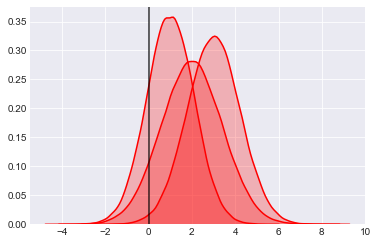

In [2]:
# generate x ~ N(mu, Cov) 
N = 100000
mean = np.array([1,2,3])
R = np.array([[ 1., -0.72550978, 0.27302286],
             [-0.72550978, 1., 0.09084194],
             [ 0.27302286, 0.09084194,  1. ]])

sigma = np.array([1.2,2,1.5])**(.5)
C = np.diag(sigma) @ R @ np.diag(sigma)
x = multivariate_normal.rvs(mean=mean, cov=C, size=N)
print("true mean: ",np.round(mean, 3)) 
print("emp mean: ", np.round(np.mean(x, axis=0), 3))
print("true var: ",np.round(sigma**2, 3)) 
print("emp var: ", np.round(np.var(x, axis=0), 3))
print("true Cov:\n", np.round(C, 3))
print("emp Cov:\n", np.round(np.cov(x.T), 3))

sns.kdeplot(x[:,0], shade=True, color='r');
sns.kdeplot(x[:,1], shade=True, color='r');
sns.kdeplot(x[:,2], shade=True, color='r');
plt.axvline(0, alpha=.6, color='black',
            linestyle='-', lw=2);


# Standardize x

Given a matrix of data $x$ we can standardize the data by taking the mutlivariate equivalent of $f(x) = (x-\mu)/ \sigma$ as follows
$$
f(x) = \Sigma^{-1/2} (x- \mu)
$$
where $\Sigma^{-1/2}$ is the inverse square root of the covariance matrix. One way to compute $\Sigma^{-1/2}$ is to calculate the empirical covariance of $Cov(x) = S$, calculate its cholesky factor of $L = Cholesky(S)$, such that $S = L L^T$, and take the inverse $L^{-1}$. 

The resulting variables are distributed as $ \sim N (0 , 1) $.

dotted lines = unit variance.        
Read the graph as BLUE $\to$ RED.    



mean:  [ 0.005 -0.003 -0.002]
var:  [1. 1. 1.]
Cov:
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


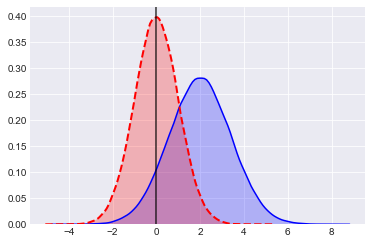

In [3]:
# Standardixe x and check the result
# blue = input
# red = result
S = np.cov(x.T)
S_inv = inv(cholesky(S))
z = (S_inv @ (x-mean).T).T
print("mean: ", np.round(np.mean(z, axis=0), 3))
print("var: ", np.round(np.var(z, axis=0), 3))
print("Cov:\n", np.round(np.cov(z.T), 3))

sns.kdeplot(x[:,1], shade=True , color = 'b');
sns.kdeplot(z[:,1], shade=True, lw = 2, linestyle = '--', color='r');
plt.axvline(0, alpha=.6, color='black', linestyle='-', lw=2);


# Generate x 

To generate $x$ starting from standard normals we can use the above logic in reverse. Given a matrix of standard normal data $z \sim N(0,1) $ (of the same shape as $x$) we can generate $x \sim N(\mu, \Sigma)$ as follows. 
$$
x = \Sigma^{1/2} z + \mu
$$

dotted lines = unit variance.        
Read the graph as BLUE $\to$ RED.    



mean:  [0.995 2.003 2.995]
var:  [1.201 2.009 1.502]
Cov:
 [[ 1.201 -1.129  0.367]
 [-1.129  2.009  0.151]
 [ 0.367  0.151  1.502]]


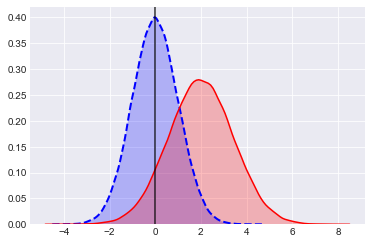

In [4]:
# generate x ~ N(mu, Cov) again using generated samples of standard normals and the choleski factor of Cov
# blue = input
# red = result

z = multivariate_normal.rvs(mean=np.zeros(3), cov=np.eye(3), size=N)

L = cholesky(C)
x = mean + (L @ z.T).T
print("mean: ", np.round(np.mean(x, axis=0), 3))
print("var: ", np.round(np.var(x, axis=0), 3))
print("Cov:\n", np.round(np.cov(x.T), 3))

sns.kdeplot(z[:,1], shade=True, lw = 2, linestyle = '--',  color = 'b');
sns.kdeplot(x[:,1], shade=True, color='r');
plt.axvline(0, alpha=.6, color='black', linestyle='-', lw=2);


If we want to decompose the covariance $\Sigma = D R D$ then the data generation process becomes 

$$
x = D R^{1/2} z + \mu
$$


dotted lines = unit variance.        
Read the graph as BLUE $\to$ RED.    



mean:  [1.001 2.007 2.999]
var:  [1.199 2.021 1.499]
Cov:
 [[ 1.199 -1.13   0.361]
 [-1.13   2.021  0.159]
 [ 0.361  0.159  1.499]]


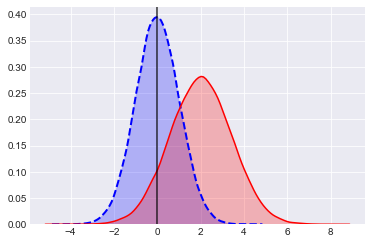

In [5]:
# generate x ~ N(mu, Cov) again using generated samples of standard normals and the choleski factor of R times sigma
# blue = input
# red = result

z = multivariate_normal.rvs(mean=np.zeros(3),
                            cov=np.eye(3), size=N)

L = cholesky(R)
x = mean + ( np.diag(sigma) @ L @ z.T).T
print("mean: ", np.round(np.mean(x, axis=0), 3))
print("var: ", np.round(np.var(x, axis=0), 3))
print("Cov:\n", np.round(np.cov(x.T), 3))

sns.kdeplot(z[:,1], shade=True, lw = 2,
            linestyle = '--',  color = 'b');
sns.kdeplot(x[:,1], shade=True, color='r');
plt.axvline(0, alpha=.6, color='black',
            linestyle='-', lw=2);


# "Scaling" x

In one dimension we can divide $x$ by the standard deviation $\sigma$ to get to a unit variance variable. The equivalent notion in the multivariate setting is trickier. 

Assume $x \sim N(\mu, \Sigma)$. It is possible to remove only the covariance dependance among the $x$'s using the transformation

$$
x_s = \Sigma^{-1/2} x
$$
where $\Sigma^{-1/2}$ is the inverse square root of the covariance matrix. One way to compute $\Sigma^{-1/2}$ is to calculate the empirical covariance of $Cov(x) = S$, calculate its cholesky factor of $L = Cholesky(S)$, such that $S = L L^T$, and take the inverse $L^{-1}$. 

The resulting variables are distributed as 
$$
x_s \sim N (\Sigma^{-1/2} \mu, I)
$$

Note that $x_s$ has now unit variance.

dotted lines = unit variance.        
Read the graph as BLUE $\to$ RED.    



true mean:  [1 2 3]
emp mean:  [1.    1.998 3.002]
true var:  [1.2 2.  1.5]
emp var:  [1.201 1.998 1.502]
true Cov:
 [[ 1.2   -1.124  0.366]
 [-1.124  2.     0.157]
 [ 0.366  0.157  1.5  ]]
emp Cov:
 [[ 1.201 -1.125  0.366]
 [-1.125  1.998  0.157]
 [ 0.366  0.157  1.502]]
mean std:  [0.913 3.021 1.077]
var std:  [1. 1. 1.]
emp Cov:
 [[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]
Sigma^(-1/2) * mean:  [0.912 3.023 1.075]


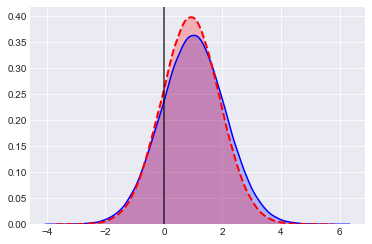

In [6]:
# generate x ~ N(mu, Cov) 
# Check that mean of scaled x, NOT standardixed, is Sigma^(-1/2) mu
N = 100000
mean = np.array([1,2,3])
R = np.array([[ 1., -0.72550978, 0.27302286],
             [-0.72550978, 1., 0.09084194],
             [ 0.27302286, 0.09084194,  1. ]])

sigma = np.array([1.2,2,1.5])**(.5)
C = np.diag(sigma) @ R @ np.diag(sigma)
# C = R
x = multivariate_normal.rvs(mean=mean, cov=C, size=N)
print("true mean: ",np.round(mean, 3)) 
print("emp mean: ", np.round(np.mean(x, axis=0), 3))
print("true var: ",np.round(sigma**2, 3)) 
print("emp var: ", np.round(np.var(x, axis=0), 3))
print("true Cov:\n", np.round(C, 3))
print("emp Cov:\n", np.round(np.cov(x.T), 3))



S = np.cov(x.T)
S_inv = inv(cholesky(S))
x_s = (S_inv @ x.T).T
print("mean std: ", np.round(np.mean(x_s, axis=0), 3))
print("var std: ", np.round(np.var(x_s, axis=0), 3))
print("emp Cov:\n", np.round(np.cov(x_s.T), 3))
print("Sigma^(-1/2) * mean: ",np.round(S_inv @ mean, 3)) 


sns.kdeplot(x[:,0], shade=True , color = 'b');
sns.kdeplot(x_s[:,0], shade=True, color='r',
            lw = 2, linestyle = '--');
plt.axvline(0, alpha=.6, color='black',
            linestyle='-', lw=2);

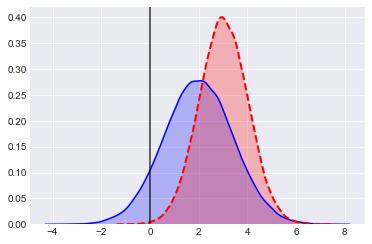

In [7]:
sns.kdeplot(x[:,1], shade=True , color = 'b');
sns.kdeplot(x_s[:,1], shade=True, color='r',  lw = 2, linestyle = '--');
plt.axvline(0, alpha=.6, color='black', linestyle='-', lw=2);


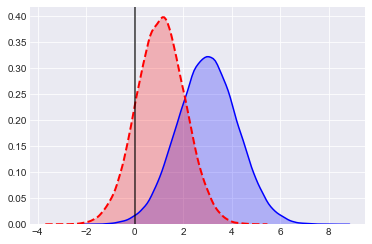

In [8]:
sns.kdeplot(x[:,2], shade=True , color = 'b');
sns.kdeplot(x_s[:,2], shade=True, color='r',
            lw = 2, linestyle = '--');
plt.axvline(0, alpha=.6, color='black',
            linestyle='-', lw=2);


# Decorrelate x

Assume $x \sim N(\mu, \Sigma)$. It is possible to remove only the correlation dependance among the $x$'s, leaving the variances in, using the transformation

$$
x_s = D \Sigma^{-1/2} x
$$
where $D = \text{diag}(\sigma_1,\sigma_2, \sigma_3)$ where $\sigma_i$ is the standard deviations. We can use the empiri


The resulting variables are distributed as 
$$
x_s \sim N (D \Sigma^{-1/2} \mu, D)
$$

true mean:  [1 2 3]
emp mean:  [1.01  1.988 3.004]
true var:  [1.2 2.  1.5]
emp var:  [1.205 2.006 1.49 ]
true Cov:
 [[ 1.2   -1.124  0.366]
 [-1.124  2.     0.157]
 [ 0.366  0.157  1.5  ]]
emp Cov:
 [[ 1.205 -1.129  0.365]
 [-1.129  2.006  0.153]
 [ 0.365  0.153  1.49 ]]
mean std:  [1.01  4.267 1.343]
var std:  [1.205 2.006 1.49 ]
emp Cov:
 [[ 1.205  0.    -0.   ]
 [ 0.     2.006 -0.   ]
 [-0.    -0.     1.49 ]]
D Sigma^(-1/2) * mean:  [1.    4.27  1.341]


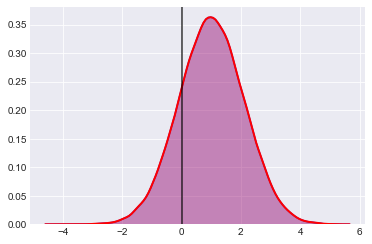

In [9]:
# generate x ~ N(mu, Cov) 
# Check that mean of scaled x, NOT standardixed, is Sigma^(-1/2) mu
N = 100000
mean = np.array([1,2,3])
R = np.array([[ 1., -0.72550978, 0.27302286],
             [-0.72550978, 1., 0.09084194],
             [ 0.27302286, 0.09084194,  1. ]])

sigma = np.array([1.2,2,1.5])**(.5)
C = np.diag(sigma) @ R @ np.diag(sigma)
# C = R
x = multivariate_normal.rvs(mean=mean, cov=C, size=N)
print("true mean: ",np.round(mean, 3)) 
print("emp mean: ", np.round(np.mean(x, axis=0), 3))
print("true var: ",np.round(sigma**2, 3)) 
print("emp var: ", np.round(np.var(x, axis=0), 3))
print("true Cov:\n", np.round(C, 3))
print("emp Cov:\n", np.round(np.cov(x.T), 3))

S = np.cov(x.T)
S_inv = inv(cholesky(S))
emp_sigma = np.std(x, axis=0)

x_s = (np.diag(emp_sigma) @ S_inv @ x.T).T
print("mean std: ", np.round(np.mean(x_s, axis=0), 3))
print("var std: ", np.round(np.var(x_s, axis=0), 3))
print("emp Cov:\n", np.round(np.cov(x_s.T), 3))
print("D Sigma^(-1/2) * mean: ",
      np.round(np.diag(emp_sigma) @ S_inv @ mean, 3)) 


sns.kdeplot(x[:,0], shade=True , color = 'b');
sns.kdeplot(x_s[:,0], shade=True, color='r',
            lw = 2, linestyle = '-');
plt.axvline(0, alpha=.6, color='black',
            linestyle='-', lw=2);

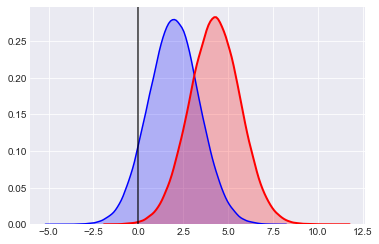

In [10]:
sns.kdeplot(x[:,1], shade=True , color = 'b');
sns.kdeplot(x_s[:,1], shade=True, color='r',
            lw = 2, linestyle = '-');
plt.axvline(0, alpha=.6, color='black',
            linestyle='-', lw=2);

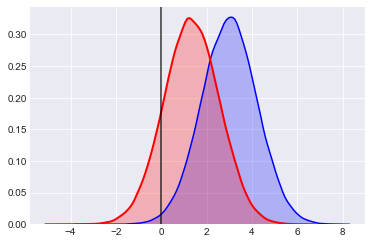

In [11]:
sns.kdeplot(x[:,2], shade=True , color = 'b');
sns.kdeplot(x_s[:,2], shade=True,
            lw = 2, color='r');
plt.axvline(0, alpha=.6, color='black',
            linestyle='-', lw=2);

# Wrong Decorrelation of x

If instead we multiply $x$ with the cholesky factor of $K = Cholesky(R)$ 
$$
x_s = R^{-1/2} x
$$

The resulting variables are __NOT__ distributed as 
$$
x_s \sim N (R^{-1/2} \mu, D)
$$
The mean is indeed $R^{-1/2} \mu$ but the covariance matrix is something different

In [12]:
# generate x ~ N(mu, Cov) 
# Check that mean of scaled x, NOT standardixed, is Sigma^(-1/2) mu
N = 100000
mean = np.array([1,2,3])
R = np.array([[ 1., -0.72550978, 0.27302286],
             [-0.72550978, 1., 0.09084194],
             [ 0.27302286, 0.09084194,  1. ]])

sigma = np.array([1.2,2,1.5])**(.5)
C = np.diag(sigma) @ R @ np.diag(sigma)
# C = R
x = multivariate_normal.rvs(mean=mean, cov=C, size=N)
print("true mean: ",np.round(mean, 3)) 
print("emp mean: ", np.round(np.mean(x, axis=0), 3))
print("true var: ",np.round(sigma**2, 3)) 
print("emp var: ", np.round(np.var(x, axis=0), 3))
print("true Cov:\n", np.round(C, 3))
print("emp Cov:\n", np.round(np.cov(x.T), 3))

L_inv = inv(cholesky(R))

x_s = ( L_inv @ x.T).T
print("mean std: ", np.round(np.mean(x_s, axis=0), 3))
print("var std: ", np.round(np.var(x_s, axis=0), 3))
print("emp Cov NOT DIAGONAL:\n",
      np.round(np.cov(x_s.T), 3))
print("R^(-1/2) * mean: ",np.round(L_inv @ mean, 3)) 


true mean:  [1 2 3]
emp mean:  [1.001 1.998 3.004]
true var:  [1.2 2.  1.5]
emp var:  [1.196 1.991 1.501]
true Cov:
 [[ 1.2   -1.124  0.366]
 [-1.124  2.     0.157]
 [ 0.366  0.157  1.5  ]]
emp Cov:
 [[ 1.196 -1.118  0.366]
 [-1.118  1.991  0.161]
 [ 0.366  0.161  1.501]]
mean std:  [1.001 3.958 1.235]
var std:  [1.196 2.108 1.546]
emp Cov NOT DIAGONAL:
 [[ 1.196 -0.364  0.222]
 [-0.364  2.108 -0.192]
 [ 0.222 -0.192  1.546]]
R^(-1/2) * mean:  [1.   3.96 1.23]
